<a href="https://colab.research.google.com/github/nisha0296/Python-Code/blob/main/ClassificationProjects/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Dataset can be downloaded from
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement

In [230]:
train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [231]:
train_original=train.copy()
test_original=test.copy()

In [232]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [233]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [234]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [235]:
train.shape,test.shape

((614, 13), (367, 12))

In [236]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [237]:
#train['Loan_Status'].value_counts(normalize=True)
train['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: >

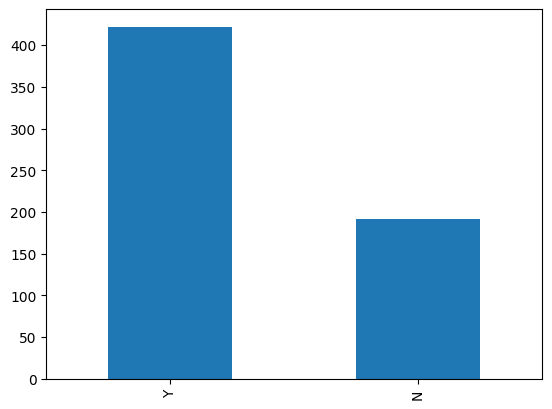

In [238]:
train['Loan_Status'].value_counts().plot.bar()


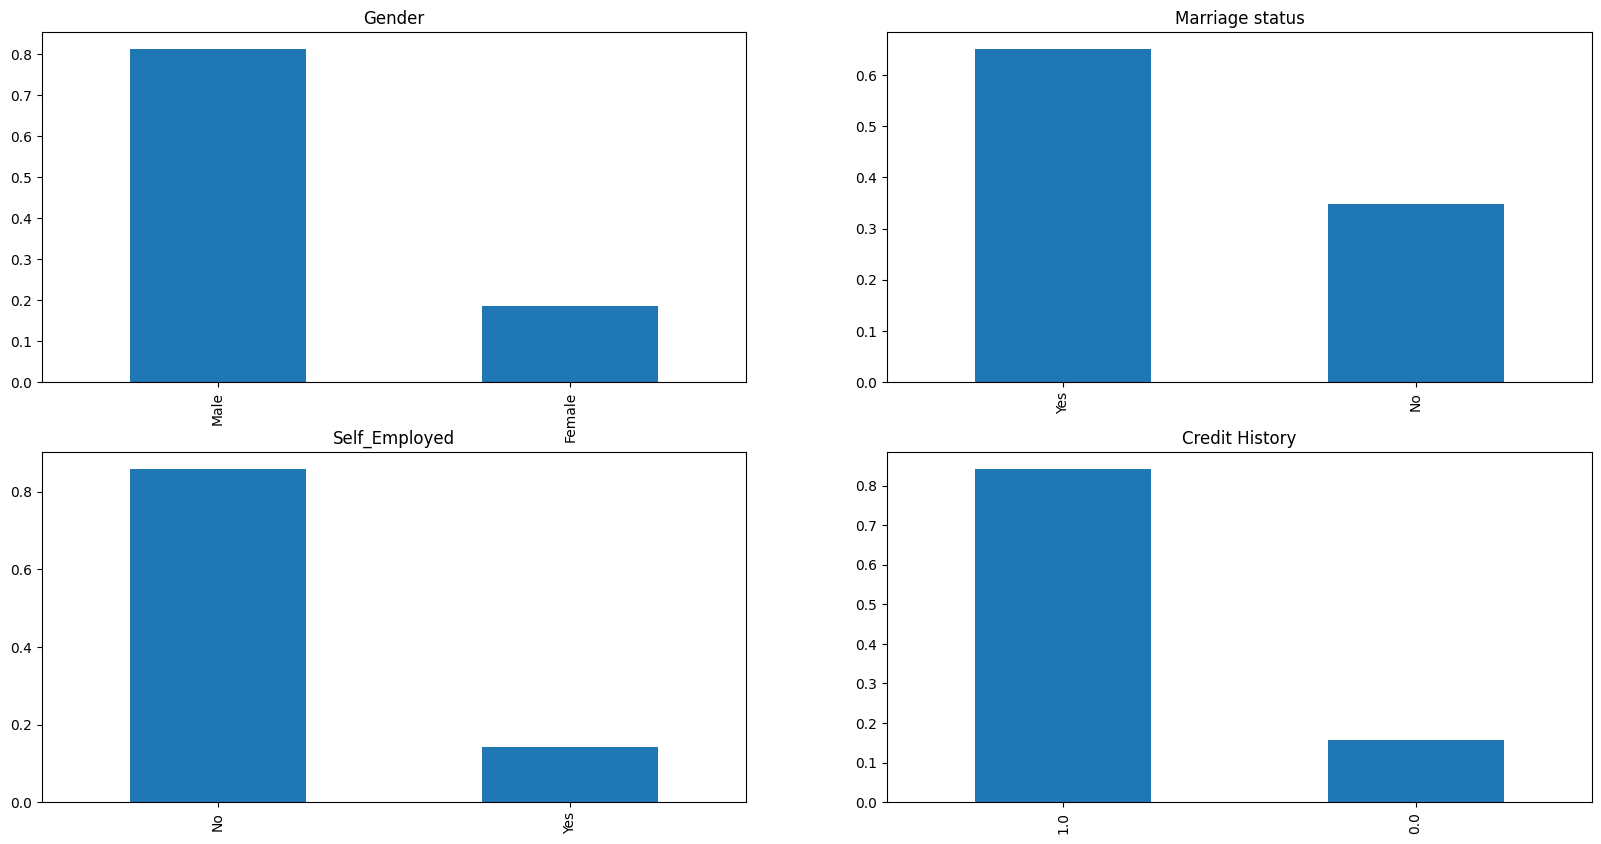

In [239]:
#Categorical Variables
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Marriage status')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')
plt.show()


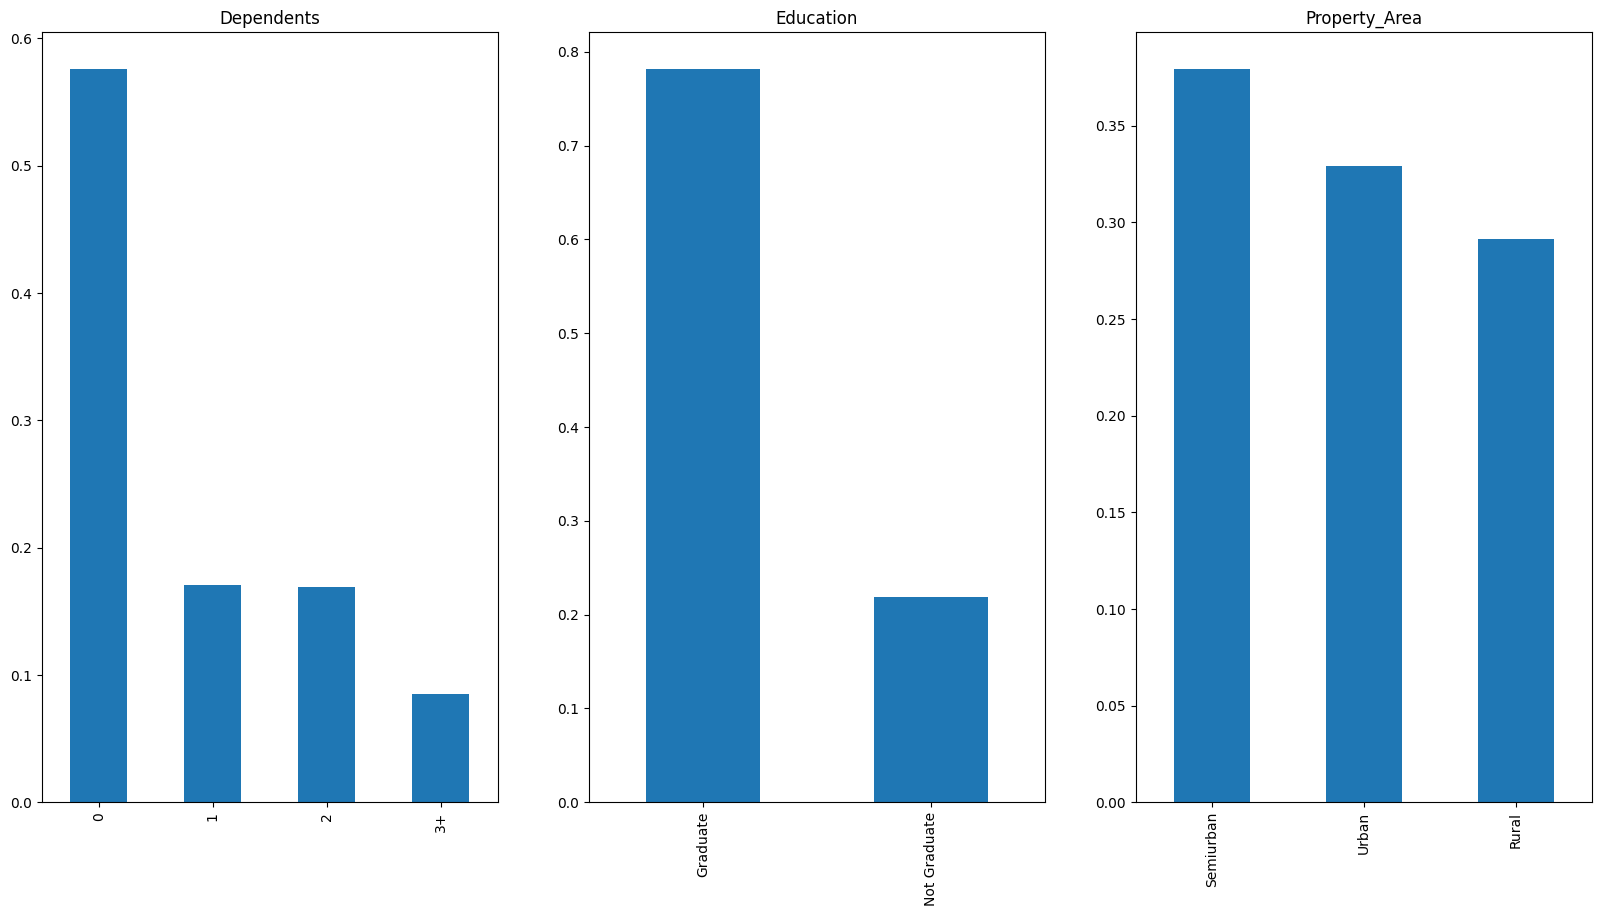

In [240]:
#Ordinal Variables
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

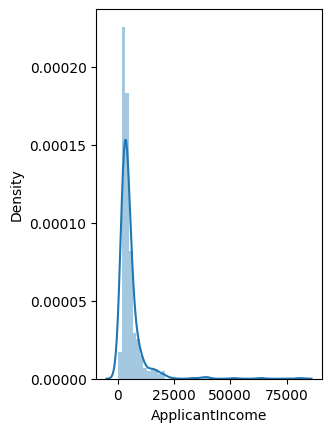

In [241]:
#Independent Variables
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])


<Axes: >

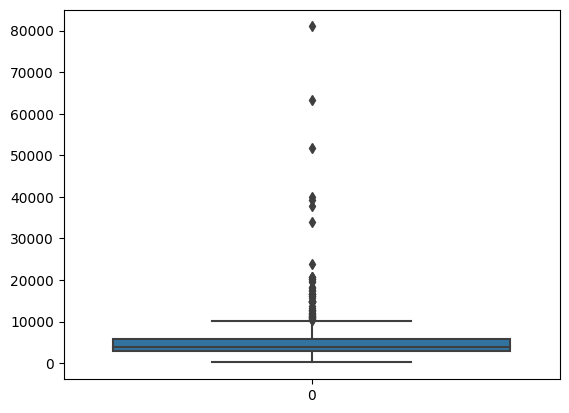

In [242]:
sns.boxplot(train['ApplicantIncome'])

Text(0.5, 0.98, '')

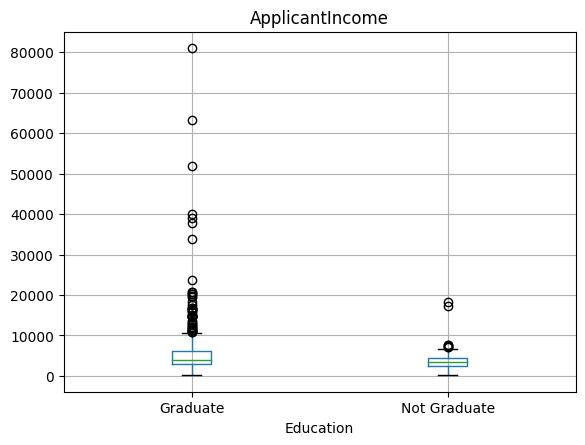

In [243]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

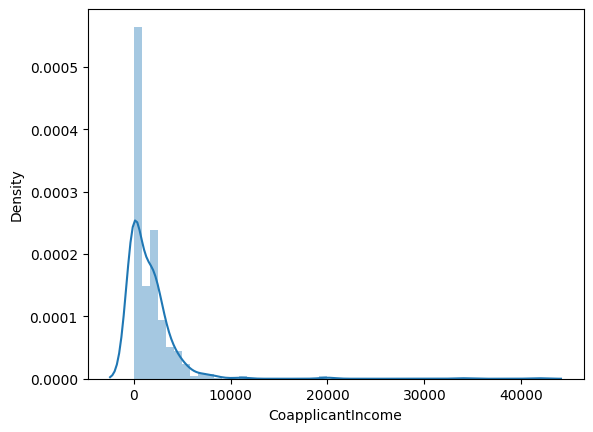

In [244]:
sns.distplot(train['CoapplicantIncome'])

<Axes: >

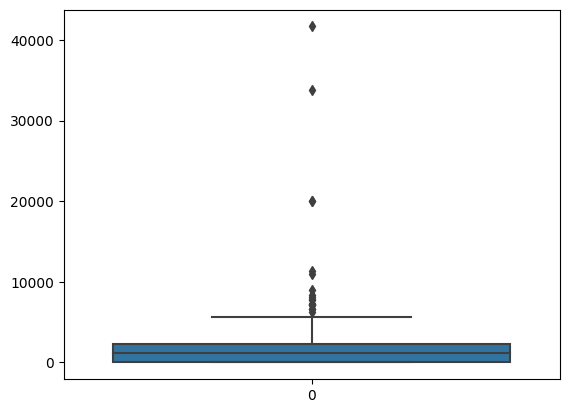

In [245]:
sns.boxplot(train['CoapplicantIncome'])

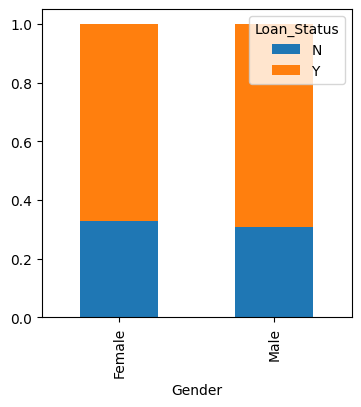

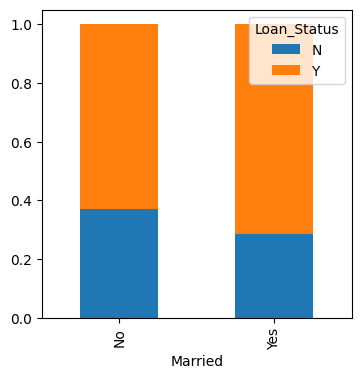

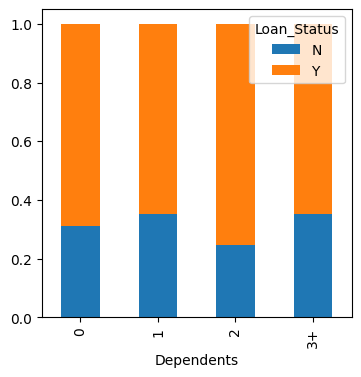

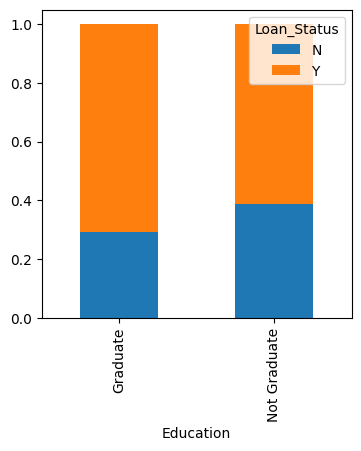

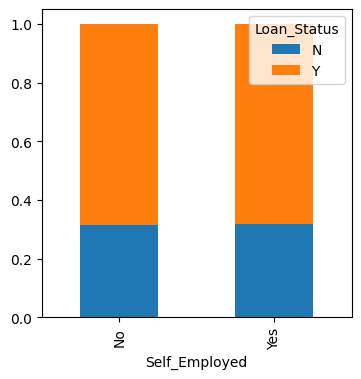

In [246]:
#Analysis of categorical variable vs Target variables
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Proportions of married applicants is higher for approved loans


Distribution of applicants with 1 or 3+ dependents is similar across both categories


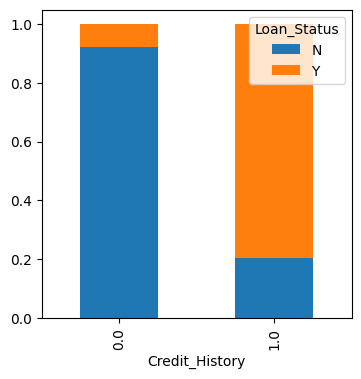

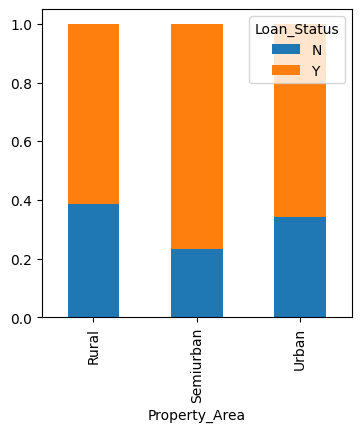

In [247]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

It seems like people with credit history 1 has more chance os getting loans approved

Proportion of loans getting approved is more in semi-urban than rural or urban areas.

In [248]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)


<Axes: >

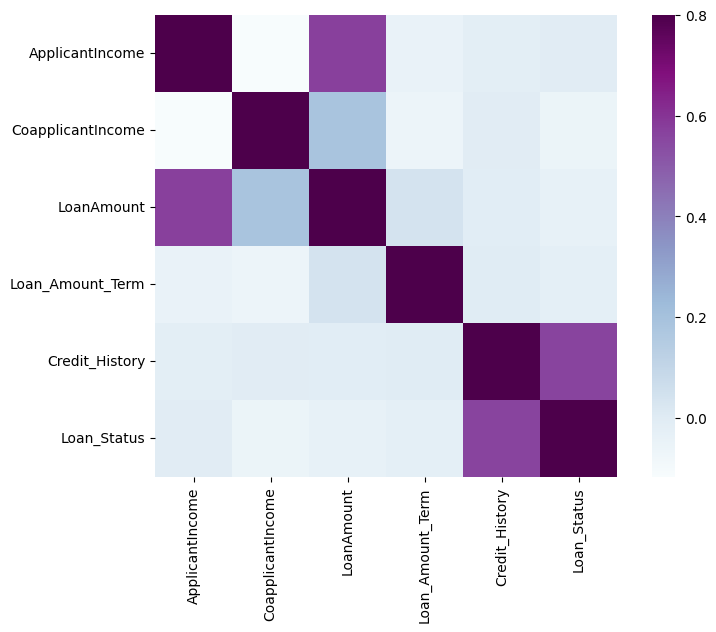

In [249]:
#Let's find out the highly co-related features
matrix=train.corr()
ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

Applicant Income - Loan Amount , Credit History - Loan Status seems to be highly co-related


Also , Loan Amount and Coaplicant Income seems to be related.

In [250]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [251]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [252]:
#We have missing values in the dataset , need to replace them
numeric_cols=train.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train.select_dtypes('object').columns.tolist()

In [253]:
categorical_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [254]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="most_frequent", missing_values=np.nan)
imputer.fit(train[categorical_cols])
train[categorical_cols]=imputer.transform(train[categorical_cols])
test[categorical_cols]=imputer.transform(test[categorical_cols])

In [255]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [256]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [257]:
# We will use median to fill missing values for Loan Amount as it is numerical variable and as per the analysis mean
# will not be the right option as it has outliers in it
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [258]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [259]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [260]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

<Axes: xlabel='Total_Income', ylabel='Density'>

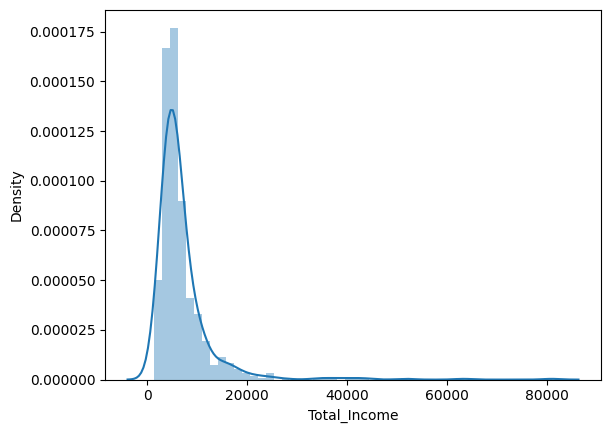

In [261]:
sns.distplot(train['Total_Income'])

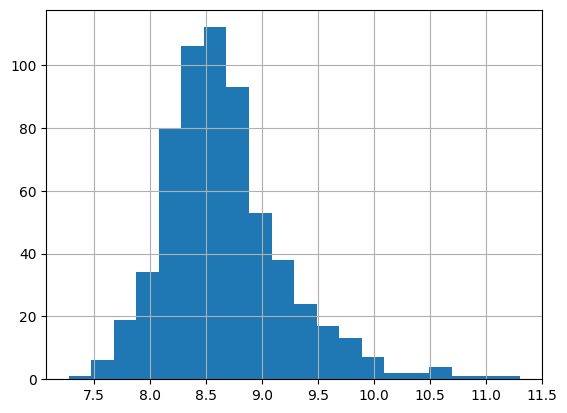

In [262]:
#Outlier Treatment
train['Total_Income_log']=np.log(train['Total_Income'])
train['Total_Income_log'].hist(bins=20)
test['Total_Income_log']=np.log(test['Total_Income'])

In [263]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

<Axes: xlabel='EMI', ylabel='Density'>

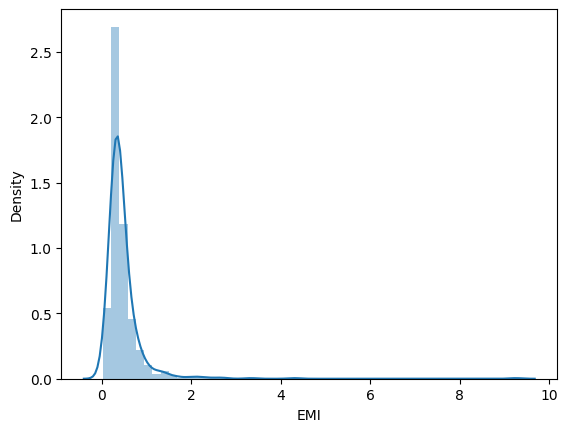

In [264]:
sns.distplot(train['EMI'])

In [265]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

<Axes: xlabel='Balance Income', ylabel='Density'>

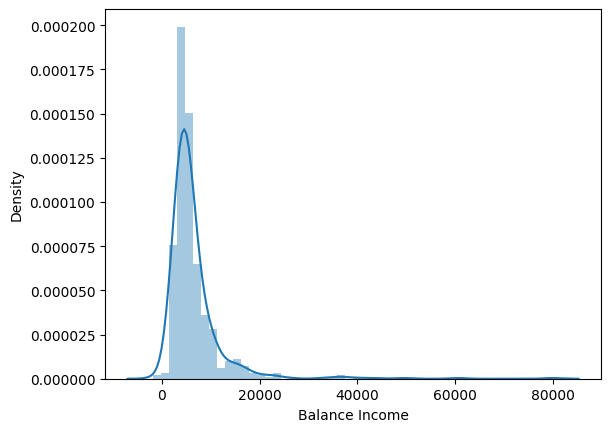

In [266]:
sns.distplot(train['Balance Income'])

In [267]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [268]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [269]:
train.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log,EMI,Balance Income
0,Male,No,0,Graduate,No,1.0,Urban,1,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,0,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,3000.0,8.006368,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4941.0,8.505323,0.333333,4607.666667
4,Male,No,0,Graduate,No,1.0,Urban,1,6000.0,8.699515,0.391667,5608.333333


In [270]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [271]:
X=pd.get_dummies(X)
test=pd.get_dummies(test)

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix,classification_report
def classify(model):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    model.fit(x_train,y_train)
    test_pred=model.predict(x_test)
    print('Accuracy:',accuracy_score(y_test,test_pred))
    print('Mean Squared Error',mean_squared_error(y_test,test_pred))
    print(confusion_matrix(y_test,test_pred))
    print(classification_report(y_test,test_pred))

In [273]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear',penalty='l2', random_state=42)
classify(model)

Accuracy: 0.7837837837837838
Mean Squared Error 0.21621621621621623
[[ 27  38]
 [  2 118]]
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



In [274]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
classify(model)

Accuracy: 0.7837837837837838
Mean Squared Error 0.21621621621621623
[[ 33  32]
 [  8 112]]
              precision    recall  f1-score   support

           0       0.80      0.51      0.62        65
           1       0.78      0.93      0.85       120

    accuracy                           0.78       185
   macro avg       0.79      0.72      0.74       185
weighted avg       0.79      0.78      0.77       185



In [275]:
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
for train_index, test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl=X.iloc[train_index],X.iloc[test_index]
  ytr,yvl=y.iloc[train_index],y.iloc[test_index]
  model=LogisticRegression(solver='liblinear',penalty='l2', random_state=42)
  model.fit(xtr,ytr)
  pred_test=model.predict(xvl)
  score=accuracy_score(yvl,pred_test)
  print('accuracy score',score)
  i=i+1
  pred_test=model.predict(test)
  pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score 0.8130081300813008

2 of kfold 5
accuracy score 0.7723577235772358

3 of kfold 5
accuracy score 0.7967479674796748

4 of kfold 5
accuracy score 0.7560975609756098

5 of kfold 5
accuracy score 0.8278688524590164


In [276]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)


In [277]:
pd.DataFrame(submission,columns=['Loan_ID', 'Loan_Status']).to_csv('Logistic.csv',index=False)

In [278]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
for train_index, test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl=X.iloc[train_index],X.iloc[test_index]
  ytr,yvl=y.iloc[train_index],y.iloc[test_index]
  model=RandomForestClassifier(max_depth=10,random_state=42)
  model.fit(xtr,ytr)
  pred_test=model.predict(xvl)
  score=accuracy_score(yvl,pred_test)
  print('accuracy score',score)
  i=i+1


1 of kfold 5
accuracy score 0.7804878048780488

2 of kfold 5
accuracy score 0.8211382113821138

3 of kfold 5
accuracy score 0.7967479674796748

4 of kfold 5
accuracy score 0.7723577235772358

5 of kfold 5
accuracy score 0.8032786885245902


In [279]:
#HyperParameter tuning for RandomForestClassifier
from sklearn.model_selection import GridSearchCV
paramgrid={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=42),paramgrid)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [280]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=81, random_state=42)

In [286]:
from sklearn.ensemble import RandomForestClassifier
i=1
kf=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
for train_index, test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl=X.iloc[train_index],X.iloc[test_index]
  ytr,yvl=y.iloc[train_index],y.iloc[test_index]
  model=RandomForestClassifier(max_depth=7,n_estimators=81,random_state=42)
  model.fit(xtr,ytr)
  pred_test=model.predict(xvl)
  score=accuracy_score(yvl,pred_test)
  print('accuracy score',score)
  i=i+1
  pred_test=model.predict(test)
  pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score 0.7886178861788617

2 of kfold 5
accuracy score 0.8130081300813008

3 of kfold 5
accuracy score 0.8048780487804879

4 of kfold 5
accuracy score 0.7804878048780488

5 of kfold 5
accuracy score 0.8114754098360656


In [287]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [288]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [289]:
pd.DataFrame(submission,columns=['Loan_ID', 'Loan_Status']).to_csv('RandomForest.csv',index=False)

<Axes: >

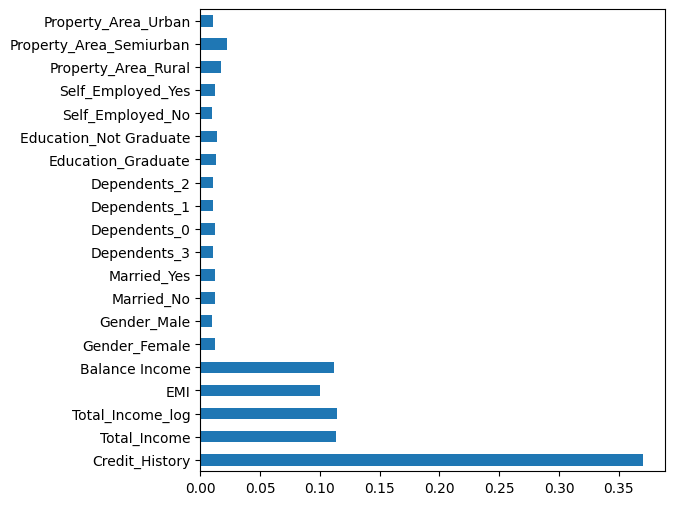

In [290]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh',figsize=(6,6))